# 1. Load Dataset

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.utils.vis_utils import plot_model
from sklearn.pipeline import make_pipeline
from tensorflow.keras import initializers
from keras.models import Sequential
from keras.models import load_model
from sklearn import preprocessing
import matplotlib.pyplot as plt
from keras.layers import Dense
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import keras

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("PLC_TEST.csv")
df.tail()

,Time,Run_Factory,Discharge_V,Fill_V,Sensor_Level
1004,20/10/2021 16:26,1,0,1.8,122
1005,20/10/2021 16:26,1,0,1.8,124
1006,20/10/2021 16:26,1,0,1.8,126
1007,20/10/2021 16:26,1,0,1.8,128
1008,20/10/2021 16:26,1,0,1.8,130


In [ ]:
df.set_index("Time", inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1009 entries, 20/10/2021 16:01 to 20/10/2021 16:26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Run_Factory   1009 non-null   int64  
 1   Discharge_V   1009 non-null   int64  
 2   Fill_V        1009 non-null   float64
 3   Sensor_Level  1009 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 39.4+ KB


In [ ]:
df.describe()

,Run_Factory,Discharge_V,Fill_V,Sensor_Level
count,1009.000000,1009.000000,1009.000000,1009.000000
mean,0.988107,3.308226,3.355302,137.117939
std,0.108458,2.209544,1.781345,22.348320
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.800000,135.000000
50%,1.000000,5.000000,4.500000,142.000000
75%,1.000000,5.000000,4.500000,147.000000
max,1.000000,5.000000,6.000000,156.000000


In [ ]:
df.dtypes

Run_Factory       int64
Discharge_V       int64
Fill_V          float64
Sensor_Level      int64
dtype: object

El mapa de calor de correlación, como se muestra a continuación, nos proporciona una descripción visual de la relación entre las variables.
No queremos un conjunto de variables independientes que tenga una relación más o menos similar con las variables dependientes.

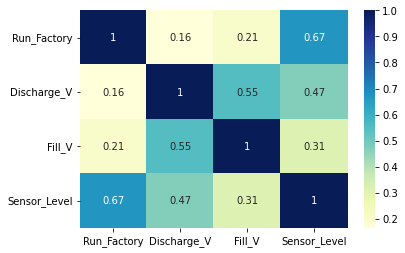

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

El factor de inflación de la varianza (VIF) cuantifica la gravedad de la multicolinealidad en un análisis de regresión de mínimos cuadrados ordinarios. Proporciona un índice que mide cuánto aumenta la varianza (el cuadrado de la desviación estándar de la estimación) de un coeficiente de regresión estimado debido a la colinealidad.
VIF among the potential independent variables

In [ ]:
X=df.fillna(0)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

       features  vif_Factor
0   Run_Factory   82.427548
1   Discharge_V    5.845723
2        Fill_V    6.679817
3  Sensor_Level   93.884487


In [ ]:
X=df.drop(["Sensor_Level"], axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

      features  vif_Factor
0  Run_Factory    5.090124
1  Discharge_V    4.678671
2       Fill_V    6.672242


Control libary

In [ ]:
pip install control

# 4. Model

In [ ]:
data = df
data = data.fillna(0)
data.head()

,Run_Factory,Discharge_V,Fill_V,Sensor_Level
Time,,,,
20/10/2021 16:01,0,0,0.0,0
20/10/2021 16:01,0,0,0.0,0
20/10/2021 16:01,0,0,0.0,0
20/10/2021 16:01,0,0,0.0,0
20/10/2021 16:01,0,0,0.0,0


In [ ]:
x = data.drop(df.columns[3], axis=1)
x.head()

,Run_Factory,Discharge_V,Fill_V
Time,,,
20/10/2021 16:01,0,0,0.0
20/10/2021 16:01,0,0,0.0
20/10/2021 16:01,0,0,0.0
20/10/2021 16:01,0,0,0.0
20/10/2021 16:01,0,0,0.0


In [ ]:
y = data.iloc[:, [3]]
y.head()

,Sensor_Level
Time,
20/10/2021 16:01,0
20/10/2021 16:01,0
20/10/2021 16:01,0
20/10/2021 16:01,0
20/10/2021 16:01,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
pipe = make_pipeline(StandardScaler())
pipe.fit(x_train, y_train)  # apply scaling on training data

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=False)

##Model Performance

In [ ]:
model = Sequential()

model.add(Dense(3, activation="relu", input_dim=3))
model.add(Dense(1, activation="relu"))

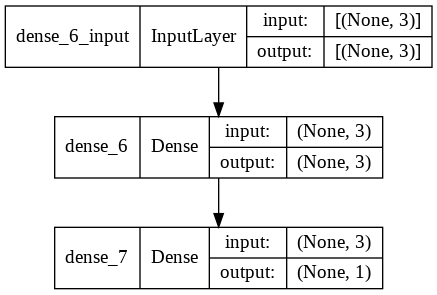

In [ ]:
plot_model(model, "model_info.png", show_shapes=True)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 12        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [ ]:
###############################################################################
#               Create the MLP network and train it
###############################################################################

model.compile(optimizer="Adamax", loss="mse")
history = model.fit(
    x_train,
    y_train,
    epochs=1000,
    batch_size=25,
    validation_data=(x_test, y_test),
    verbose=2,
    use_multiprocessing=True,
)

Epoch 1/1000
29/29 - 0s - loss: 18344.9492 - val_loss: 17954.1738 - 398ms/epoch - 14ms/step
Epoch 2/1000
29/29 - 0s - loss: 18219.3613 - val_loss: 17829.3418 - 58ms/epoch - 2ms/step
Epoch 3/1000
29/29 - 0s - loss: 18088.4316 - val_loss: 17699.5820 - 60ms/epoch - 2ms/step
Epoch 4/1000
29/29 - 0s - loss: 17957.4902 - val_loss: 17569.9629 - 64ms/epoch - 2ms/step
Epoch 5/1000
29/29 - 0s - loss: 17824.9043 - val_loss: 17440.9805 - 53ms/epoch - 2ms/step
Epoch 6/1000
29/29 - 0s - loss: 17690.5371 - val_loss: 17305.7324 - 57ms/epoch - 2ms/step
Epoch 7/1000
29/29 - 0s - loss: 17550.4297 - val_loss: 17164.4727 - 62ms/epoch - 2ms/step
Epoch 8/1000
29/29 - 0s - loss: 17402.2812 - val_loss: 17011.4766 - 53ms/epoch - 2ms/step
Epoch 9/1000
29/29 - 0s - loss: 17241.7402 - val_loss: 16852.3965 - 62ms/epoch - 2ms/step
Epoch 10/1000
29/29 - 0s - loss: 17079.3301 - val_loss: 16691.9766 - 60ms/epoch - 2ms/step
Epoch 11/1000
29/29 - 0s - loss: 16914.6660 - val_loss: 16525.3125 - 51ms/epoch - 2ms/step
Epoch 

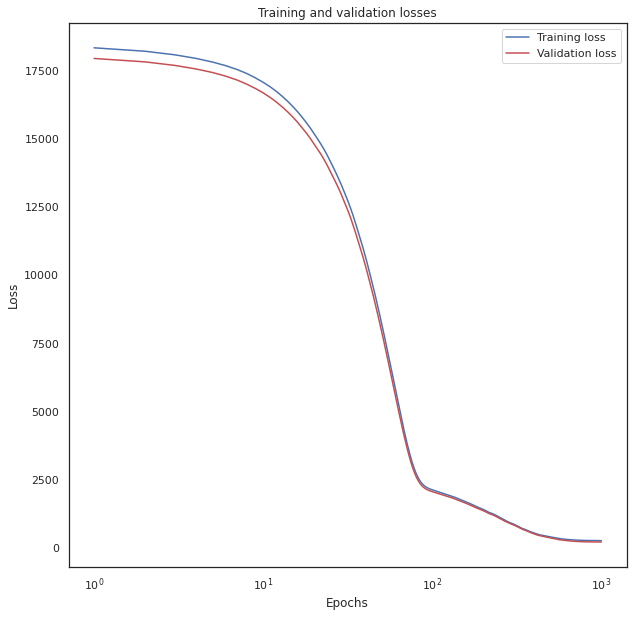

In [ ]:
###############################################################################
#       plot training and validation curves
###############################################################################
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xscale("log")
# plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
model.save('model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('model.h5')

In [ ]:
###############################################################################
#               Create the MLP network and train it
###############################################################################

model.compile(optimizer="Adamax", loss="mse")
history = model.fit(
    x_train,
    y_train,
    epochs=1000,
    batch_size=25,
    validation_data=(x_test, y_test),
    verbose=2,
    use_multiprocessing=True,
)

Epoch 1/1000
29/29 - 0s - loss: 256.9487 - val_loss: 205.2458 - 385ms/epoch - 13ms/step
Epoch 2/1000
29/29 - 0s - loss: 256.7472 - val_loss: 205.1980 - 53ms/epoch - 2ms/step
Epoch 3/1000
29/29 - 0s - loss: 256.7206 - val_loss: 205.2692 - 54ms/epoch - 2ms/step
Epoch 4/1000
29/29 - 0s - loss: 256.7098 - val_loss: 205.2344 - 47ms/epoch - 2ms/step
Epoch 5/1000
29/29 - 0s - loss: 256.7128 - val_loss: 205.2227 - 51ms/epoch - 2ms/step
Epoch 6/1000
29/29 - 0s - loss: 256.7587 - val_loss: 205.2259 - 57ms/epoch - 2ms/step
Epoch 7/1000
29/29 - 0s - loss: 256.7139 - val_loss: 205.0888 - 56ms/epoch - 2ms/step
Epoch 8/1000
29/29 - 0s - loss: 256.6760 - val_loss: 205.1367 - 55ms/epoch - 2ms/step
Epoch 9/1000
29/29 - 0s - loss: 256.6739 - val_loss: 205.0700 - 68ms/epoch - 2ms/step
Epoch 10/1000
29/29 - 0s - loss: 256.6499 - val_loss: 205.1481 - 62ms/epoch - 2ms/step
Epoch 11/1000
29/29 - 0s - loss: 256.6464 - val_loss: 205.1046 - 65ms/epoch - 2ms/step
Epoch 12/1000
29/29 - 0s - loss: 256.6655 - val_lo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.7)

clf = RandomForestClassifier()